In [2]:
import markov_clustering as mc
import networkx as nx
import random

# Set a random seed for reproducibility
random.seed(42)

# number of nodes to use
numnodes = 200

# generate random positions as a dictionary where the key is the node id and the value
# is a tuple containing 2D coordinates
positions = {i:(random.random() * 2 - 1, random.random() * 2 - 1) for i in range(numnodes)}

# use networkx to generate the graph
network = nx.random_geometric_graph(numnodes, 0.3, pos=positions)

# then get the adjacency matrix (in sparse form)
import scipy.sparse as sp

# Convert NetworkX graph to SciPy sparse matrix
matrix = sp.csr_matrix(nx.adjacency_matrix(network))

Matplotlib not present
Visualization not supported to missing libraries.


In [4]:
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

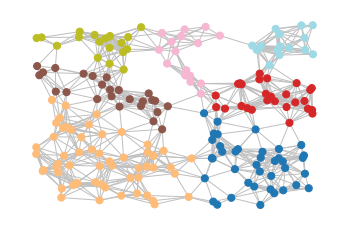

In [9]:
mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

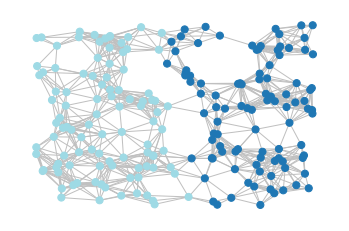

In [30]:
result = mc.run_mcl(matrix, inflation=1.1)
# If the clustering is too fine for your taste, reducing the MCL inflation parameter to 1.4 (from the default of 2) will result in coarser clustering. e.g.
clusters = mc.get_clusters(result)
mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

In [17]:
# perform clustering using different inflation values from 1.5 and 2.5
# for each clustering run, calculate the modularity
for inflation in [i / 10 for i in range(15, 26)]:
    result = mc.run_mcl(matrix, inflation=inflation)
    clusters = mc.get_clusters(result)
    Q = mc.modularity(matrix=result, clusters=clusters)
    print("inflation:", inflation, "modularity:", Q)

inflation: 1.5 modularity: 0.832713754646841
inflation: 1.6 modularity: 0.8377259447890117
inflation: 1.7 modularity: 0.8373760000000032
inflation: 1.8 modularity: 0.8432000000000035
inflation: 1.9 modularity: 0.8432000000000035
inflation: 2.0 modularity: 0.8435200000000037
inflation: 2.1 modularity: 0.8422400000000032
inflation: 2.2 modularity: 0.841696000000003
inflation: 2.3 modularity: 0.841696000000003
inflation: 2.4 modularity: 0.8442240000000026
inflation: 2.5 modularity: 0.8352283910430123


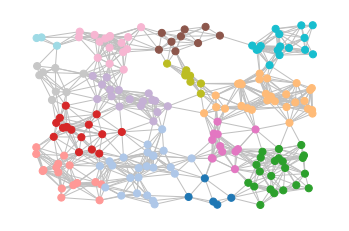

In [18]:
# cluster using the optimized cluster inflation value
result = mc.run_mcl(matrix, inflation=2.1)
clusters = mc.get_clusters(result)
mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

In [2]:
pip install --upgrade networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install markov_clustering

Note: you may need to restart the kernel to use updated packages.


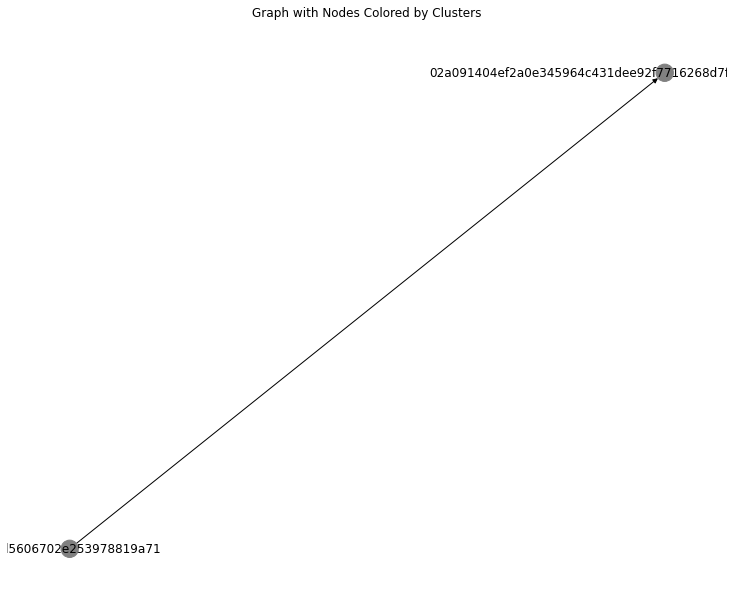

In [28]:
import numpy as np
import markov_clustering as mc
import networkx as nx
import matplotlib.pyplot as plt
import random

# Sample data
data = {
  "_id": {
    "$oid": "663d5606702e253978819a71"
  },
  "txid": "02a091404ef2a0e345964c431dee92f7716268d7f71791eba6d1a0210789fd98",
  "indexOut": 0,
  "value": 11553,
  "scriptPubKey": "0 50185e01273e7d750b560d7294f651e3c752c6f7",
  "address": [
    "bc1q2qv9uqf88e7h2z6kp4effaj3u0r493hh50kckk"
  ],
  "input_address": [
    [
      "3QKAn2B1uDquujLZnoynVoq1M9uac66Ysr"
    ]
  ],
  "values": [
    795759
  ]
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes
input_id = data["_id"]["$oid"]
output_id = data["txid"]
G.add_node(input_id)
G.add_node(output_id)

# Add edges
node_sizes = [1 / G.nodes[node].get('amount', 1) for node in G.nodes]
G.add_edge(input_id, output_id, weight=data["value"])

# Convert the graph to an adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G)

# Convert the adjacency matrix to a numpy array
adjacency_array = adjacency_matrix.toarray()

# Run Markov Clustering
result = mc.run_mcl(adjacency_array)

# Get clusters
clusters = mc.get_clusters(result)

# Assign colors to clusters
colors = {}
for i, cluster in enumerate(clusters):
    color = (random.random(), random.random(), random.random())  # Random color
    for node in cluster:
        colors[node] = color

# Draw the graph with nodes colored by clusters
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

# Collect node colors based on clusters
node_colors = [colors[node] if node in colors else (0.5, 0.5, 0.5) for node in G.nodes()]

nx.draw(G, pos, node_size=300, node_color=node_colors, with_labels=True)
plt.title('Graph with Nodes Colored by Clusters')
plt.show()

In [ ]:
bitcoin_direct.test.json

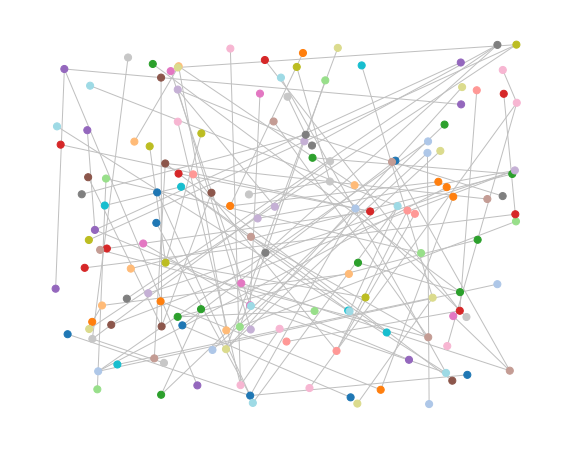

In [85]:
import numpy as np
import markov_clustering as mc
import networkx as nx
import matplotlib.pyplot as plt
import json

# Read JSON data from file
with open('bitcoin_direct.test.json') as f:
    data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

for entry in data:
    input_id = entry["_id"]["$oid"]
    output_id = entry["txid"]
    G.add_node(input_id)
    G.add_node(output_id)
    # Accessing the nested "value" field
    value = entry["value"]
    if isinstance(value, dict):
        # Extract the numeric value from the dictionary
        value = float(value["$numberLong"])
    else:
        # Use the numeric value directly
        value = float(value)
    G.add_edge(input_id, output_id, weight=value)


# Define positions using the spring layout algorithm
pos = nx.spring_layout(G)

# Convert the graph to an adjacency matrix
matrix = nx.adjacency_matrix(G)

# Run Markov Clustering with the optimized inflation value (e.g., 2.1)
result = mc.run_mcl(matrix, inflation=1.01)

# Get clusters
clusters = mc.get_clusters(result)

# Assign colors to clusters
colors = {}
for i, cluster in enumerate(clusters):
    color = (random.random(), random.random(), random.random())  # Random color
    for node in cluster:
        colors[node] = color

# Draw the graph with nodes colored by clusters
plt.figure(figsize=(10, 8))
clusters = mc.get_clusters(result)
mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

In [90]:
clusters = mc.get_clusters(result)
print("All clusters:", clusters)

def get_node_clusters(node_id, clusters):
    node_clusters = []
    for i, cluster in enumerate(clusters):
        if node_id in cluster:
            node_clusters.append(i)
    return node_clusters

node_id = "2"
node_clusters = get_node_clusters(node_id, clusters)
print(f"Node {node_id} belongs to cluster(s): {node_clusters}")

All clusters: [(0,), (1, 2), (3,), (4, 8), (5,), (6,), (7,), (9,), (10, 11), (12,), (13, 15), (14,), (16, 17), (18,), (19, 20), (21,), (22,), (23, 24), (25, 26), (27,), (28,), (29,), (30, 31), (32,), (33, 34), (35,), (36, 37), (38, 39), (40,), (41,), (42, 43), (44, 45), (45, 46), (47,), (48, 49), (50,), (51, 53), (52,), (54, 55), (56,), (57,), (58, 59), (60,), (61,), (62, 63), (64,), (65,), (66, 67), (68,), (69,), (70, 71), (72,), (73,), (74, 75), (76,), (77,), (78, 79), (80,), (81,), (82, 83), (84,), (85,), (86, 87), (88,), (89,), (90, 91), (92,), (93,), (94, 95), (96,), (97,), (98, 99), (100,), (101,), (102, 103), (104,), (105,), (106, 107), (108,), (109,), (110, 111), (112,), (113,), (114, 115), (116,), (117,), (118, 119), (120,), (121,), (122, 123), (124,), (125,), (126, 127), (128,), (129,), (130, 131), (132,), (133,), (134, 135), (136,), (137,), (138, 139), (140,), (141,), (142, 143), (144,), (145,), (146, 147), (148,), (149,)]
Node 2 belongs to cluster(s): []


In [92]:
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")
    if node_id in cluster:
        print(f"Node {node_id} found in Cluster {i}")

Cluster 0: (0,)
Cluster 1: (1, 2)
Cluster 2: (3,)
Cluster 3: (4, 8)
Cluster 4: (5,)
Cluster 5: (6,)
Cluster 6: (7,)
Cluster 7: (9,)
Cluster 8: (10, 11)
Cluster 9: (12,)
Cluster 10: (13, 15)
Cluster 11: (14,)
Cluster 12: (16, 17)
Cluster 13: (18,)
Cluster 14: (19, 20)
Cluster 15: (21,)
Cluster 16: (22,)
Cluster 17: (23, 24)
Cluster 18: (25, 26)
Cluster 19: (27,)
Cluster 20: (28,)
Cluster 21: (29,)
Cluster 22: (30, 31)
Cluster 23: (32,)
Cluster 24: (33, 34)
Cluster 25: (35,)
Cluster 26: (36, 37)
Cluster 27: (38, 39)
Cluster 28: (40,)
Cluster 29: (41,)
Cluster 30: (42, 43)
Cluster 31: (44, 45)
Cluster 32: (45, 46)
Cluster 33: (47,)
Cluster 34: (48, 49)
Cluster 35: (50,)
Cluster 36: (51, 53)
Cluster 37: (52,)
Cluster 38: (54, 55)
Cluster 39: (56,)
Cluster 40: (57,)
Cluster 41: (58, 59)
Cluster 42: (60,)
Cluster 43: (61,)
Cluster 44: (62, 63)
Cluster 45: (64,)
Cluster 46: (65,)
Cluster 47: (66, 67)
Cluster 48: (68,)
Cluster 49: (69,)
Cluster 50: (70, 71)
Cluster 51: (72,)
Cluster 52: (73,)


In [ ]:
# 5/15

In [8]:
import markov_clustering as mc
import networkx as nx
import random
import scipy.sparse as sp


# Set a random seed for reproducibility
random.seed(42)

# number of nodes to use
numnodes = 200

# generate random positions as a dictionary where the key is the node id and the value
# is a tuple containing 2D coordinates
positions = {i:(random.random() * 2 - 1, random.random() * 2 - 1) for i in range(numnodes)}

# use networkx to generate the graph
network = nx.random_geometric_graph(numnodes, 0.3, pos=positions)

# Convert NetworkX graph to SciPy sparse matrix
matrix = sp.csr_matrix(nx.adjacency_matrix(network))

# Run Markov Clustering
result = mc.run_mcl(matrix)
clusters = mc.get_clusters(result)

# Initialize a dictionary to store the central node in each cluster
central_nodes = {}

# Find the central node in each cluster based on degree centrality
for cluster in clusters:
    if len(cluster) > 0:
        cluster_subgraph = network.subgraph(cluster)
        degree_centrality = nx.degree_centrality(cluster_subgraph)
        if degree_centrality:
            central_node = max(cluster_subgraph.nodes(), key=lambda x: degree_centrality.get(x, 0))
            central_nodes[central_node] = cluster

print(central_nodes)

{0: (0, 20, 59, 98, 134), 131: (1, 4, 11, 25, 34, 39, 40, 42, 56, 65, 72, 92, 95, 102, 103, 106, 131, 144, 148, 156, 169, 187, 192), 14: (2, 7, 10, 14, 15, 18, 19, 30, 38, 43, 48, 51, 60, 61, 75, 85, 90, 110, 132, 147, 150, 151, 175, 186, 194, 195), 155: (3, 9, 12, 36, 55, 69, 82, 87, 91, 93, 101, 118, 135, 143, 155, 165, 166, 170, 173, 176, 177, 178), 29: (5, 21, 29, 47, 53, 67, 74, 88, 94, 109, 123, 126, 138, 179, 191, 193), 137: (6, 13, 22, 23, 33, 44, 62, 77, 79, 84, 115, 117, 128, 137, 152, 171, 197), 78: (8, 17, 52, 58, 70, 76, 78, 83, 89, 120, 122, 139, 158, 182, 183, 196, 198), 41: (16, 41, 54, 97, 113, 121, 133, 136, 142), 37: (24, 37, 46, 124, 140, 141, 146, 174, 180, 181, 188, 190, 199), 96: (26, 35, 71, 81, 96, 104, 105, 114, 125, 129, 153, 159, 163, 168, 172, 189), 108: (27, 31, 73, 86, 108, 111, 116, 119, 185), 162: (28, 45, 50, 68, 80, 112, 145, 162), 130: (32, 49, 57, 64, 66, 99, 100, 107, 127, 130, 154, 157, 160, 161, 164, 167), 184: (63, 149, 184)}


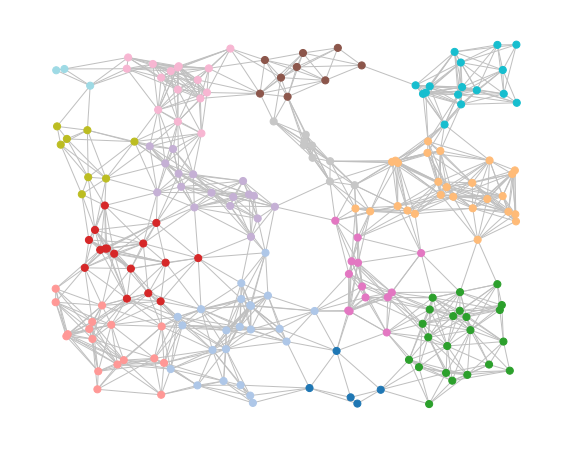

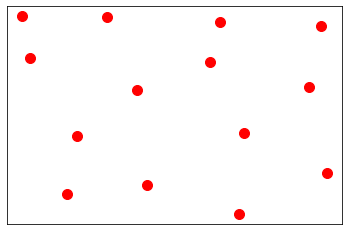

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
clusters = mc.get_clusters(result)
mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")
nx.draw_networkx_nodes(network, positions, nodelist=central_nodes.keys(), node_size=100, node_color='red')
plt.show()

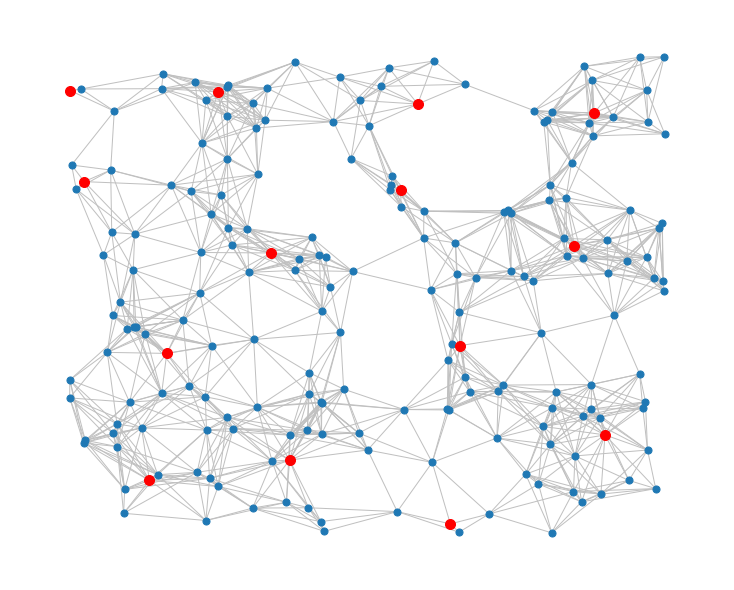

In [13]:
plt.figure(figsize=(10, 8))
nx.draw(network, pos=positions, node_size=50, with_labels=False, edge_color="silver")
nx.draw_networkx_nodes(network, positions, nodelist=central_nodes.keys(), node_size=100, node_color='red')
plt.show()

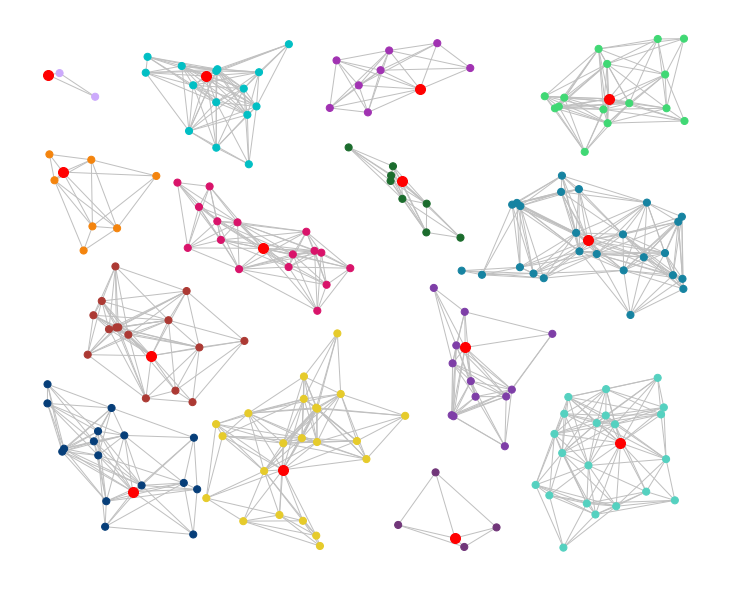

In [16]:
# Assign a color to each cluster
cluster_colors = {}
for i, cluster in enumerate(clusters):
    cluster_color = (random.random(), random.random(), random.random())
    for node in cluster:
        cluster_colors[node] = cluster_color
for cluster in clusters:
    if len(cluster) > 0:
        cluster_subgraph = network.subgraph(cluster)
        degree_centrality = nx.degree_centrality(cluster_subgraph)
        if degree_centrality:
            central_node = max(cluster_subgraph.nodes(), key=lambda x: degree_centrality.get(x, 0))
            central_nodes[central_node] = positions[central_node]
plt.figure(figsize=(10, 8))
for cluster in clusters:
    cluster_nodes = network.subgraph(cluster)
    nx.draw(cluster_nodes, pos=positions, node_size=50, node_color=[cluster_colors[node] for node in cluster], with_labels=False, edge_color="silver")
nx.draw_networkx_nodes(network, positions, nodelist=central_nodes.keys(), node_size=100, node_color='red')
plt.show()

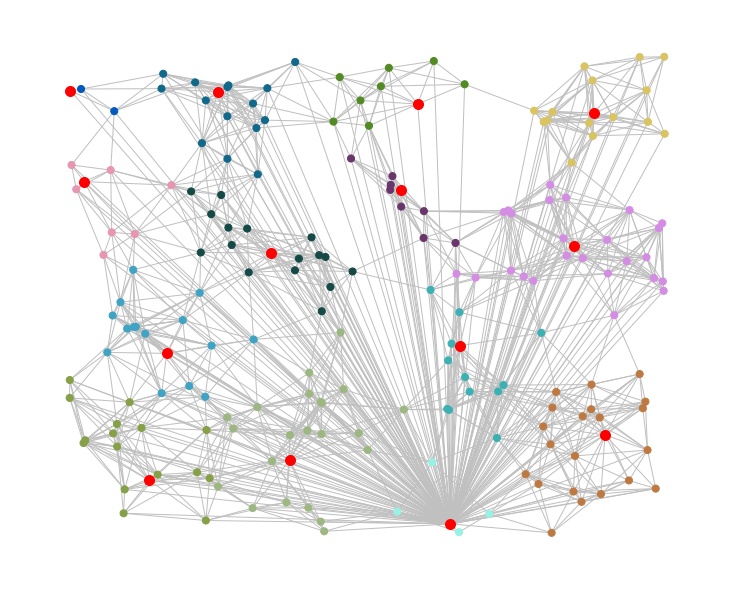

In [17]:
# Assign a color to each cluster
cluster_colors = {}
for i, cluster in enumerate(clusters):
    cluster_color = (random.random(), random.random(), random.random())
    for node in cluster:
        cluster_colors[node] = cluster_color

# Find the central node in each cluster based on degree centrality
for cluster in clusters:
    if len(cluster) > 0:
        cluster_subgraph = network.subgraph(cluster)
        degree_centrality = nx.degree_centrality(cluster_subgraph)
        if degree_centrality:
            central_node = max(cluster_subgraph.nodes(), key=lambda x: degree_centrality.get(x, 0))
            central_nodes[central_node] = positions[central_node]

# Create a new graph to represent the overview
overview_graph = nx.Graph()

# Add all nodes and edges from the original graph
overview_graph.add_nodes_from(network.nodes())
overview_graph.add_edges_from(network.edges())

# Connect central nodes of each cluster to form the overview
for central_node in central_nodes.keys():
    overview_graph.add_node(central_node)

for cluster in clusters:
    for node in cluster:
        overview_graph.add_edge(list(central_nodes.keys())[0], node)

# Draw the overview graph
plt.figure(figsize=(10, 8))
nx.draw(overview_graph, pos=positions, node_size=50, node_color=[cluster_colors[node] for node in overview_graph.nodes()], with_labels=False, edge_color="silver")
nx.draw_networkx_nodes(overview_graph, positions, nodelist=central_nodes.keys(), node_size=100, node_color='red')
plt.show()

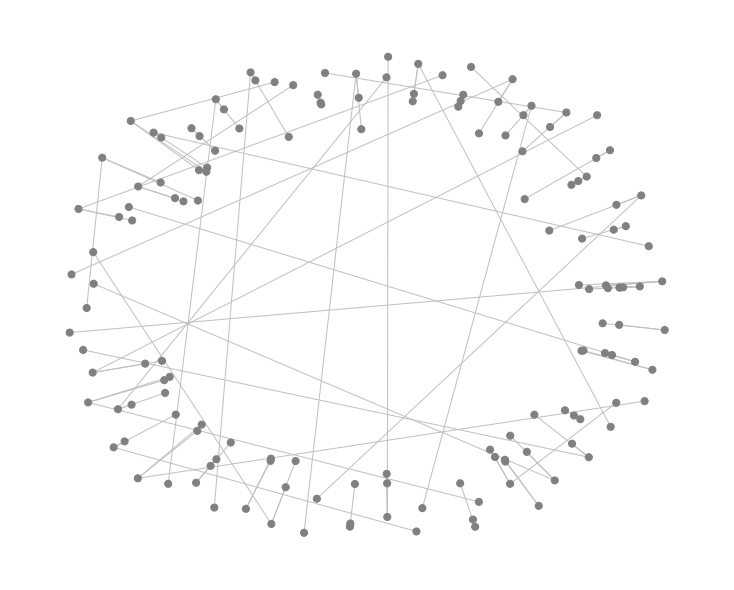

In [3]:
# !pip install markov_clustering
import random
import numpy as np
import markov_clustering as mc
import networkx as nx
import matplotlib.pyplot as plt
import json
import csv
import scipy.sparse as sp

# Read JSON data from file
with open('bitcoin_direct.test.json') as f:
    data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

for entry in data:
    input_id = entry["_id"]["$oid"]
    output_id = entry["txid"]
    # This is for node creation
    G.add_node(input_id)
    G.add_node(output_id)
    # Accessing the nested "value" field
    value = entry["value"]
    if isinstance(value, dict):
        # Extract the numeric value from the dictionary
        value = float(value["$numberLong"])
    else:
        # Use the numeric value directly
        value = float(value)
    # This is for edge creation
    G.add_edge(input_id, output_id, weight=value)

# Define positions using the spring layout algorithm
positions = nx.spring_layout(G)

# Convert NetworkX graph to SciPy sparse matrix
matrix = sp.csr_matrix(nx.adjacency_matrix(G))

# =========================================================================================================
# Markov Clustering Part
result = mc.run_mcl(matrix, inflation = 1.01)
clusters = mc.get_clusters(result)
# print("Clusters:")
# print(clusters)

# =========================================================================================================
# Degree Centrality Part
# Initialize a dictionary to store the central node in each cluster
central_nodes = {}
cluster_colors = {}
for i, cluster in enumerate(clusters):
    cluster_color = (random.random(), random.random(), random.random())
    for node in cluster:
        cluster_colors[node] = cluster_color

for cluster in clusters:
    if len(cluster) > 0:
        cluster_subgraph = G.subgraph(cluster)
        betweenness_centrality = nx.betweenness_centrality(cluster_subgraph)
        if betweenness_centrality:
            central_node = max(cluster_subgraph.nodes(), key=lambda x: betweenness_centrality.get(x, 0))
            central_nodes[central_node] = positions[central_node]

# print("Central Nodes:")
# print(central_nodes)

# this is how I print graph for your reference
# plt.figure(figsize=(10, 8))
# for cluster in clusters:
#     cluster_nodes = G.subgraph(cluster)
#     nx.draw(cluster_nodes, pos=positions, node_size=50, node_color=[cluster_colors[node] for node in cluster], with_labels=False, edge_color="silver")
# nx.draw_networkx_nodes(G, positions, nodelist=central_nodes.keys(), node_size=100, node_color='red')
# plt.show()

# =========================================================================================================
# Define a function to save cluster information to a CSV file
def save_clusters_to_csv(clusters, central_nodes, cluster_colors, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Node', 'Cluster', 'Central'])

        for i, cluster in enumerate(clusters):
            for node in cluster:
                is_central = 1 if node in central_nodes else 0
                writer.writerow([node, i, is_central])

# Save cluster information to a CSV file
save_clusters_to_csv(clusters, central_nodes, cluster_colors, 'cluster_info.csv')

# ===========================================================================================================
# Create a new graph to represent the overview
overview_graph = nx.Graph()

# Add all nodes and edges from the original graph
overview_graph.add_nodes_from(G.nodes())
overview_graph.add_edges_from(G.edges())

# Connect central nodes of each cluster to form the overview
for central_node, cluster in central_nodes.items():
    for node in cluster:
        
        overview_graph.add_edge(central_node, node)

# Save the overview graph to a file
nx.write_graphml(overview_graph, 'overview_graph.graphml')

# ===========================================================================================================
# Draw the overview graph
plt.figure(figsize=(10, 8))
node_colors = [cluster_colors[node] if node in cluster_colors else 'gray' for node in overview_graph.nodes()]
node_colors_central = ['red' if node in central_nodes else color for node, color in zip(overview_graph.nodes(), node_colors)]
nx.draw(overview_graph, pos=positions, node_size=50, node_color=node_colors_central, with_labels=False, edge_color="silver")

# Save the graph as an image file (JPG format)
plt.savefig('overview_graph.jpg')

# # Display the graph
# plt.show()

# Cases notification:
# If in-degree values are 0 for a clusters, which suggests that there are no edges directed towards the nodes in the cluster.
# If crashes due to running time or cache, run steps one by one, for example, run till [# Save cluster information to a CSV file] instead of generating the graph.

In [2]:
import json
import random

# Generate JSON data for 100 transactions
transactions = []
for i in range(1, 101):
    transaction = {
        "_id": {"$oid": str(i)},
        "txid": "txid_" + str(i),
        "value": {"$numberLong": str(random.randint(1, 100))}
    }
    transactions.append(transaction)

# Write the JSON data to a file
with open('bitcoin_transactions.json', 'w') as f:
    json.dump(transactions, f, indent=4)

print("JSON file generated successfully.")

JSON file generated successfully.
